<a href="https://colab.research.google.com/github/Anou26/Mini-Project/blob/main/Stock_Price_Forecasting_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

In [ ]:
# IMPORTING DATASET 
url='https://raw.githubusercontent.com/Anou26/Mini-Project/main/%5ENSEI%20(1).csv' #after lockdown

#url='https://raw.githubusercontent.com/Anou26/Mini-Project/main/%5ENSEI%20(3).csv' #before lockdown

In [ ]:
df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,10-08-2020,11270.25000,11337.29981,11238.00000,11270.15039,11270.15039,492000.0
1,11-08-2020,11322.25000,11373.59961,11299.15039,11322.50000,11322.50000,586100.0
2,12-08-2020,11289.00000,11322.00000,11242.65039,11308.40039,11308.40039,609900.0
3,13-08-2020,11334.84961,11359.29981,11269.95020,11300.45020,11300.45020,562400.0
4,14-08-2020,11353.29981,11366.25000,11111.45020,11178.40039,11178.40039,645100.0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
244,02-08-2021,15874.90039,15892.90039,15834.65039,15885.15039,15885.15039,244800.0
245,03-08-2021,15951.54981,16146.90039,15914.34961,16130.75000,16130.75000,341300.0
246,04-08-2021,16195.25000,16290.20020,16176.15039,16258.79981,16258.79981,427300.0
247,05-08-2021,16288.95020,16349.45020,16210.29981,16294.59961,16294.59961,418200.0
248,06-08-2021,16304.40039,16336.75000,16223.29981,16238.20020,16238.20020,320100.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       247 non-null    float64
 2   High       247 non-null    float64
 3   Low        247 non-null    float64
 4   Close      247 non-null    float64
 5   Adj Close  247 non-null    float64
 6   Volume     247 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.7+ KB


In [ ]:
#DATA CLEANING
df = df.drop(df.index[[71,103]]) #these rows had Null values throughout
#df = df.drop(df.index[[153]]) 
df = df.dropna() #removing the NA values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       245 non-null    object 
 1   Open       245 non-null    float64
 2   High       245 non-null    float64
 3   Low        245 non-null    float64
 4   Close      245 non-null    float64
 5   Adj Close  245 non-null    float64
 6   Volume     245 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.3+ KB


In [ ]:
 # TAKING DIFFERENT INDICATORS FOR PREDICTION
#Filtering only the close price
data = df.filter(['Close'])
dataset=data.values
len(dataset)
print(dataset)

[[11270.15039]
 [11322.5    ]
 [11308.40039]
 [11300.4502 ]
 [11178.40039]
 [11247.09961]
 [11385.34961]
 [11408.40039]
 [11312.2002 ]
 [11371.59961]
 [11466.4502 ]
 [11472.25   ]
 [11549.59961]
 [11559.25   ]
 [11647.59961]
 [11387.5    ]
 [11470.25   ]
 [11535.     ]
 [11527.4502 ]
 [11333.84961]
 [11355.04981]
 [11317.34961]
 [11278.     ]
 [11449.25   ]
 [11464.4502 ]
 [11440.04981]
 [11521.79981]
 [11604.54981]
 [11516.09961]
 [11504.9502 ]
 [11250.54981]
 [11153.65039]
 [11131.84961]
 [10805.54981]
 [11050.25   ]
 [11227.54981]
 [11222.40039]
 [11247.54981]
 [11416.9502 ]
 [11503.34961]
 [11662.40039]
 [11738.84961]
 [11834.59961]
 [11914.2002 ]
 [11930.9502 ]
 [11934.5    ]
 [11971.04981]
 [11680.34961]
 [11762.4502 ]
 [11873.04981]
 [11896.79981]
 [11937.65039]
 [11896.4502 ]
 [11930.34961]
 [11767.75   ]
 [11889.40039]
 [11729.59961]
 [11670.79981]
 [11642.40039]
 [11669.15039]
 [11813.5    ]
 [11908.5    ]
 [12120.29981]
 [12263.54981]
 [12461.04981]
 [12631.09961]
 [12749.15

<function matplotlib.pyplot.show>

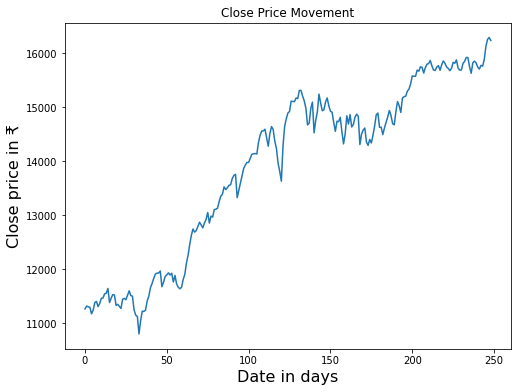

In [ ]:
#Plotting the close price movement
plt.figure(figsize=(8,6))
plt.title('Close Price Movement')
plt.plot(df['Close'])
plt.xlabel('Date in days',fontsize=16)
plt.ylabel('Close price in ₹',fontsize=16)
plt.show

In [ ]:
# PREPARATION OF TIME SERIES DATASET
#Normalize the dataset
#Feature Scaling
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [ ]:
scaled_data

array([[0.08464135],
       [0.09417845],
       [0.09160977],
       [0.0901614 ],
       [0.06792625],
       [0.08044194],
       [0.10562845],
       [0.10982786],
       [0.09230202],
       [0.10312346],
       [0.12040342],
       [0.12146004],
       [0.13555166],
       [0.13730977],
       [0.15340539],
       [0.10602021],
       [0.12109567],
       [0.13289189],
       [0.13151646],
       [0.09624613],
       [0.1001084 ],
       [0.09324015],
       [0.0860714 ],
       [0.11726988],
       [0.12003906],
       [0.11559378],
       [0.13048707],
       [0.14556253],
       [0.1294486 ],
       [0.12741739],
       [0.0810705 ],
       [0.06341727],
       [0.05944559],
       [0.        ],
       [0.0445797 ],
       [0.07688034],
       [0.07594221],
       [0.08052396],
       [0.11138547],
       [0.12712579],
       [0.1561018 ],
       [0.17002939],
       [0.18747321],
       [0.20197492],
       [0.20502645],
       [0.20567315],
       [0.21233183],
       [0.159

In [ ]:
#TRAIN-TEST SPLIT
train_data = data.iloc[:,4:5].values #selecting only the closing prices for training
training_data_size=int(len(dataset) * 0.8)
testing_data_size=len(dataset) - training_data_size
print("Training data size =", training_data_size)
print("Testing data size =", testing_data_size)

Training data size = 196
Testing data size = 49


In [ ]:
#TRAINING THE MODEL
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = [] 
for i in range(1,len(train_data)):   ##timestep=1
  x_train.append(train_data[i-1:i, 0]) 
  y_train.append(train_data[i,0])
  if i<=1:
    print(x_train)
    print(y_train)

[array([0.08464135])]
[0.09417844778890538]


In [ ]:
#RESHAPING TRAIN DATA
x_train, y_train = np.array(x_train), np.array(y_train) #We do this to convert the data into array so that we can use it for the lstm model
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1)) #Our data is in 2-D but lstm expects 3-D so we convert it
x_train.shape

(195, 1, 1)

In [ ]:
#LSTM MODEL
model = Sequential()
model.add(LSTM(units=100, return_sequences = True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences = False))
model.add(Dense(units = 1, activation ='linear'))

In [ ]:
model.compile(optimizer='adam',loss="mean_squared_error", metrics='mse')

In [ ]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.1, batch_size=32)

Epoch 1/100
6/6 [==============================] - 4s 159ms/step - loss: 0.2599 - mse: 0.2599 - val_loss: 0.5119 - val_mse: 0.5119
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.2289 - mse: 0.2289 - val_loss: 0.4513 - val_mse: 0.4513
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1958 - mse: 0.1958 - val_loss: 0.3838 - val_mse: 0.3838
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1604 - mse: 0.1604 - val_loss: 0.3067 - val_mse: 0.3067
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1205 - mse: 0.1205 - val_loss: 0.2220 - val_mse: 0.2220
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0807 - mse: 0.0807 - val_loss: 0.1354 - val_mse: 0.1354
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0271 - mse: 0.0271 - v

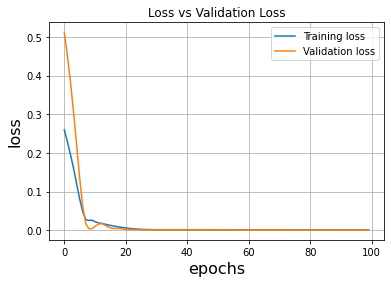

In [ ]:
plt.plot(history.history['loss'],label="Training loss")
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title("Loss vs Validation Loss")
plt.legend()
plt.grid(True);

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 1, 100)            40800     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#TESTING THE MODEL
test_data = scaled_data[training_data_size - 1:, :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(1, len(test_data)):
  x_test.append(test_data[i-1:i, 0])

In [ ]:
x_test = np.array(x_test) #We convert testing data to an array

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1)) #Reshaping our 2-D testing data into 3-D 

In [ ]:
predictions = model.predict(x_test) #We use the testing data to generate our prediction
predictions = scaler.inverse_transform(predictions) #We inverse our initial transformed data to original form for prediction

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

181.59829203443923

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

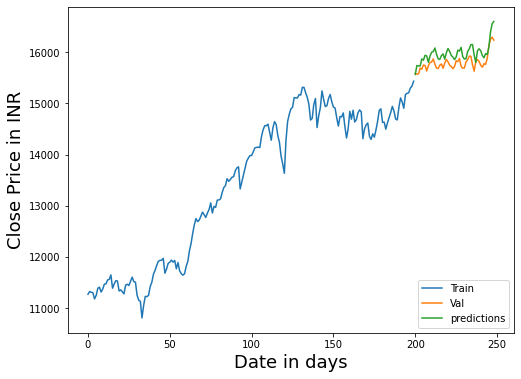

In [ ]:
#Plotting our predictions
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(8,6))
plt.xlabel('Date in days' , fontsize=18)
plt.ylabel('Close Price in INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

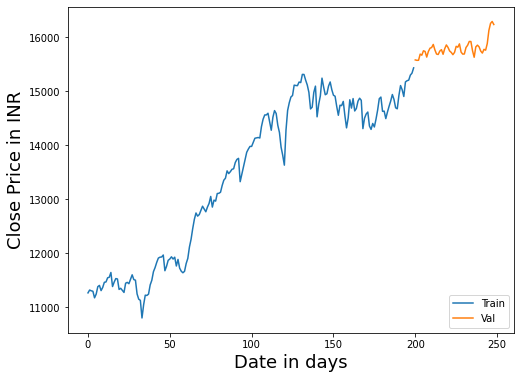

In [ ]:
train = data[:training_data_size]
valid = data[training_data_size:]
plt.figure(figsize=(8,6))
plt.xlabel('Date in days', fontsize=18)
plt.ylabel('Close Price in INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.legend(['Train','Val'],loc='lower right')
plt.show

In [ ]:
train

,Close
0,11270.15039
1,11322.50000
2,11308.40039
3,11300.45020
4,11178.40039
...,...
195,15197.70020
196,15208.45020
197,15301.45020
198,15337.84961


In [ ]:
predictions

array([[15568.411 ],
       [15742.202 ],
       [15732.773 ],
       [15734.375 ],
       [15870.166 ],
       [15846.192 ],
       [15943.453 ],
       [15929.624 ],
       [15804.628 ],
       [15926.8125],
       [16000.652 ],
       [16015.668 ],
       [16084.747 ],
       [15962.502 ],
       [15871.42  ],
       [15861.814 ],
       [15937.286 ],
       [15968.737 ],
       [15866.109 ],
       [15989.969 ],
       [16074.021 ],
       [16019.093 ],
       [15939.621 ],
       [15907.376 ],
       [15857.817 ],
       [15908.213 ],
       [16042.72  ],
       [16023.359 ],
       [16097.287 ],
       [15915.029 ],
       [15869.511 ],
       [15872.852 ],
       [16016.269 ],
       [16066.3125],
       [16151.081 ],
       [16150.113 ],
       [15944.351 ],
       [15800.763 ],
       [16030.332 ],
       [16068.843 ],
       [16030.813 ],
       [15937.227 ],
       [15892.915 ],
       [15975.572 ],
       [15957.109 ],
       [16103.921 ],
       [16402.15  ],
       [16559

In [ ]:
valid

,Close
200,15582.79981
201,15574.84961
202,15576.20020
203,15690.34961
204,15670.25000
205,15751.65039
206,15740.09961
207,15635.34961
208,15737.75000
209,15799.34961
